In [20]:
# preamble
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# get data
from load_dataset import load_dataset
from split_dataset import split_dataset
X, y  = load_dataset()
X_train, X_test, y_train, y_test = split_dataset(X, y)

In [3]:
# prepare for 5-classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [5]:
# train SGD classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [9]:
# test classifier
sgd_clf.predict([X[0]])

array([ True])

In [12]:
# measure performance
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
# compare with dumb clasiffier
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [14]:
# using confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [16]:
# compute precision and recall
from sklearn.metrics import precision_score, recall_score, f1_score
# precision: ratio of true positive to predicted positive: how much of the predicted positive are correct?
print("Precision: " ,precision_score(y_train_5, y_train_pred))
# recall: ratio of true positive to total positive: how much of the total positive were correctly predicted?
print("Recall: ", recall_score(y_train_5, y_train_pred))
# f1 score: harmonic mean between precision and recall
print("F1 score: ", f1_score(y_train_5, y_train_pred))

Precision:  0.8370879772350012
Recall:  0.6511713705958311
F1 score:  0.7325171197343846


In [18]:
# get precision-recall curves
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

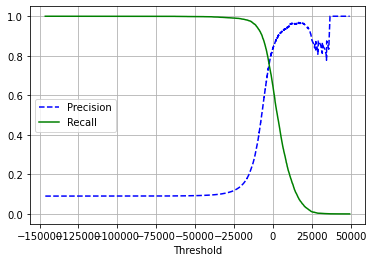

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.grid()
    plt.legend()
    plt.xlabel("Threshold")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

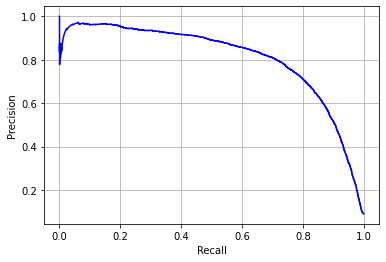

In [25]:
plt.plot(recalls[:-1], precisions[:-1], "b-")
plt.grid()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

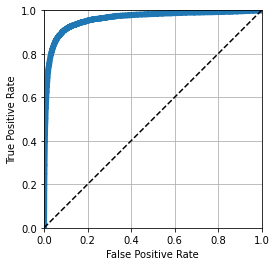

ROC AUC score:  0.9604938554008616


In [38]:
# roc curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=6, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
    plt.xlim((0,1))
    plt.ylim((0,1))
plot_roc_curve(fpr,tpr)
plt.show()
print("ROC AUC score: ", roc_auc_score(y_train_5, y_scores))

In [36]:
# use random forrest classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

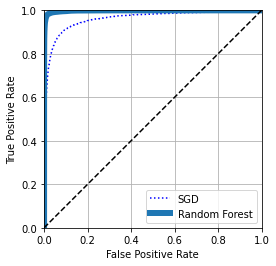

0.9983436731328145

In [40]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()
roc_auc_score(y_train_5, y_scores_forest)